In [1]:
#Importing Libraries and Reading in Data:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

retail = pd.read_csv('retail_store_inventory.csv')

retail.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [2]:
# Set the 'Date' column as the index
retail.set_index('Date', inplace=True)

In [3]:
retail.head()

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
Date,,,,,,,,,,,,,,
2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
#Shape of Data:

retail.shape

(73100, 14)

In [5]:
#Checking data types:

retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73100 entries, 2022-01-01 to 2024-01-01
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store ID            73100 non-null  object 
 1   Product ID          73100 non-null  object 
 2   Category            73100 non-null  object 
 3   Region              73100 non-null  object 
 4   Inventory Level     73100 non-null  int64  
 5   Units Sold          73100 non-null  int64  
 6   Units Ordered       73100 non-null  int64  
 7   Demand Forecast     73100 non-null  float64
 8   Price               73100 non-null  float64
 9   Discount            73100 non-null  int64  
 10  Weather Condition   73100 non-null  object 
 11  Holiday/Promotion   73100 non-null  int64  
 12  Competitor Pricing  73100 non-null  float64
 13  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 8.4+ MB


In [6]:
# Checking for Null values:

retail.isnull().sum()

,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0
Discount,0


In [7]:
#Checking for unique values:

retail.nunique()

,0
Store ID,5
Product ID,20
Category,5
Region,4
Inventory Level,451
Units Sold,498
Units Ordered,181
Demand Forecast,31608
Price,8999
Discount,5


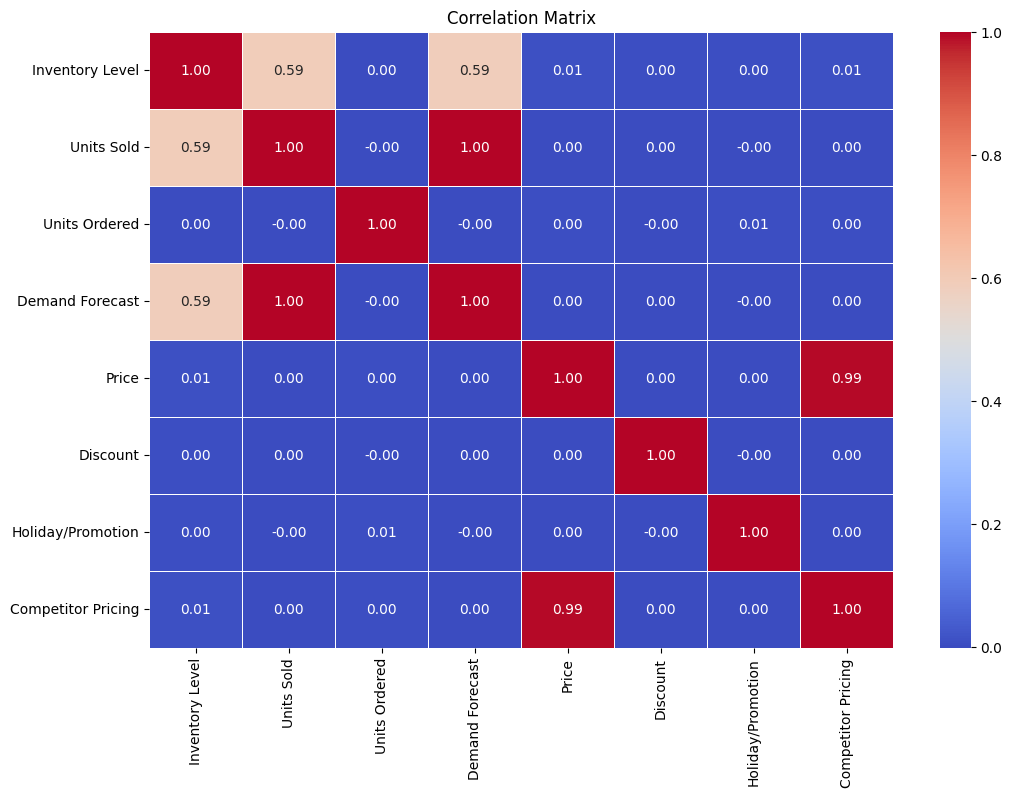

In [8]:
# Select only numeric columns for correlation
numeric_columns = retail.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns
corr_matrix = retail[numeric_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [9]:
#Descriptive Statistics:

retail.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [10]:
# Question 1: Is there a relationship between the level of Sales and the Season?

#Total Units sold by season:
season_sales = retail.groupby('Seasonality')['Units Sold'].sum()
print(season_sales)

Seasonality
Autumn    2506676
Spring    2487940
Summer    2479015
Winter    2501951
Name: Units Sold, dtype: int64


<ipython-input-23-ced8364a39b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seasonality', y='Units Sold', data=season_sales, palette='coolwarm')


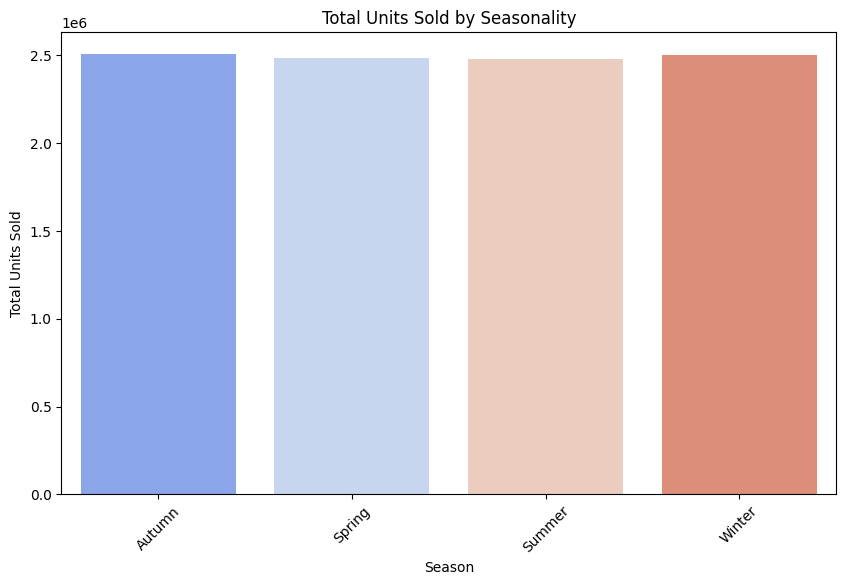

In [23]:
# Total Units Sold by Seasonality (Bar Plot)
season_sales = retail.groupby('Seasonality')['Units Sold'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasonality', y='Units Sold', data=season_sales, palette='coolwarm')
plt.title('Total Units Sold by Seasonality')
plt.xlabel('Season')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()


In [12]:
# There is not a strong relationship between Sales and Season. Winter has the highest Units Sold, but there is not a great difference in Units Sold among the 4 seasons.

In [13]:
# Question #2: How does Price Compare with the Competition?

# Calculate Price Difference
retail['Price Difference'] = retail['Price'] - retail['Competitor Pricing']
retail.head()

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Price Difference
Date,,,,,,,,,,,,,,,
2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,3.81
2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,-3.15
2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,-3.33
2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,-2.02
2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,4.69


<ipython-input-14-4ef0411c80d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Price Difference", data=category_avg, palette="coolwarm")


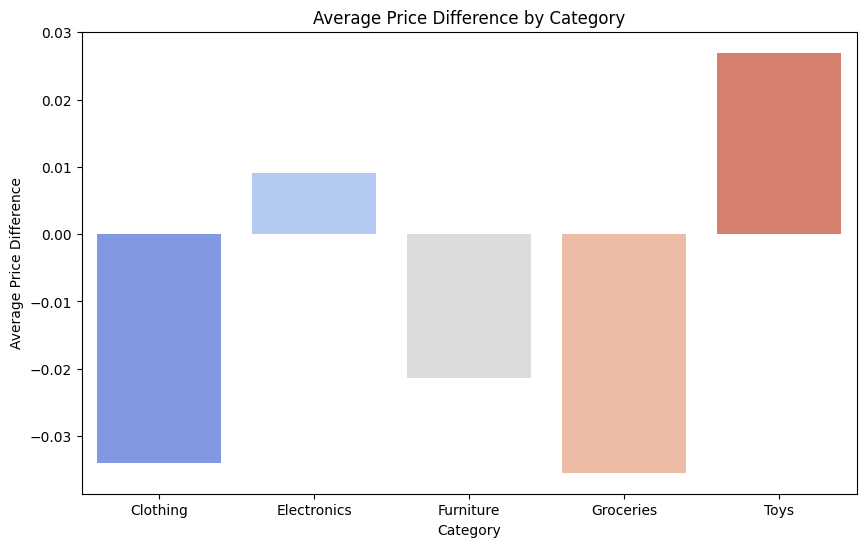

In [14]:
# Group by Category and calculate the average Price Difference
category_avg = retail.groupby("Category")["Price Difference"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Category", y="Price Difference", data=category_avg, palette="coolwarm")
plt.title("Average Price Difference by Category")
plt.xlabel("Category")
plt.ylabel("Average Price Difference")
plt.show()


In [15]:
# This Company's Prices on Average Perform better than the Competition in 3 Categories: Clothing, Furniture, and Groceries. The Competition performs better in terms of Electronics and Toys.
# Recommendation would be for this company to take a look at Electronics and Toys to see if they could improve their pricing strategy to match the competition.

In [16]:
#Question 3: How does Holiday Promotion affect Units Sold?

# Calculate average Units Sold for each Holiday/Promotion group
avg_units_sold = retail.groupby("Holiday/Promotion")["Units Sold"].mean().reset_index()

# Print the results
print(avg_units_sold)

   Holiday/Promotion  Units Sold
0                  0  136.505375
1                  1  136.423926


<ipython-input-17-18062ab930c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Holiday/Promotion", y="Units Sold", data=retail, palette="coolwarm")


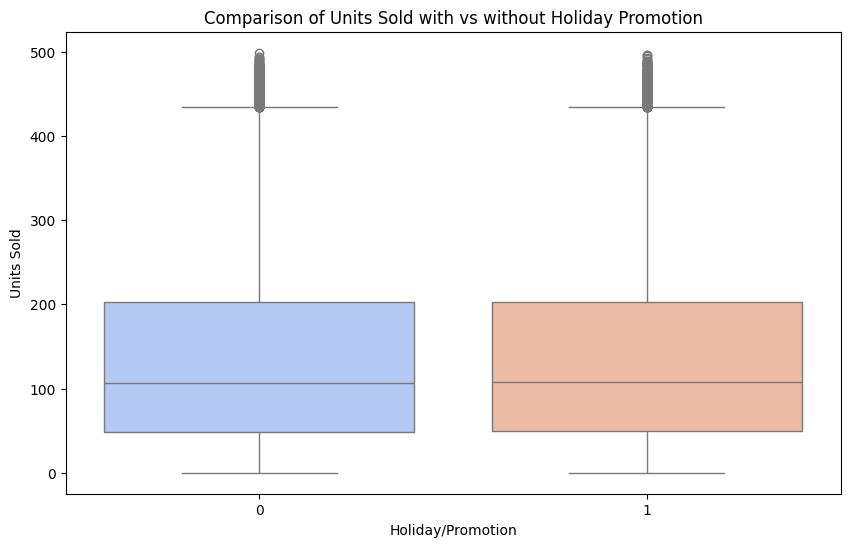

In [17]:
# Boxplot to compare Units Sold based on Holiday/Promotion
plt.figure(figsize=(10, 6))
sns.boxplot(x="Holiday/Promotion", y="Units Sold", data=retail, palette="coolwarm")
plt.title("Comparison of Units Sold with vs without Holiday Promotion")
plt.xlabel("Holiday/Promotion")
plt.ylabel("Units Sold")
plt.show()


In [18]:
# Holiday Promotions do not appear to have a significant affect on Units Sold.

In [19]:
#Question 4: How do Customer Orders compare with Amount Sold?

# Group by Product ID and sum the Units Ordered, Units Sold, and Inventory Level
product_summary = retail.groupby('Product ID')[['Units Ordered', 'Units Sold', 'Inventory Level']].sum().reset_index()

# Calculate the correlation between Units Ordered, Units Sold, and Inventory Level
correlation_ordered_sold = product_summary["Units Ordered"].corr(product_summary["Units Sold"])
correlation_ordered_inventory = product_summary["Units Ordered"].corr(product_summary["Inventory Level"])

print(f"Correlation between Units Ordered and Units Sold: {correlation_ordered_sold}")
print(f"Correlation between Units Ordered and Inventory Level: {correlation_ordered_inventory}")



Correlation between Units Ordered and Units Sold: 0.1301780033464842
Correlation between Units Ordered and Inventory Level: 0.3152223671646376


In [20]:
#There is a weak correlation between Units Ordered and Units Sold, and also a weak correlation between Units Orderd and Inventory Level.

In [21]:
# KeyTakeaways: 1. There is not a strong relationship between Sales and Season
#               2. This Company's prices perform better than Competition in 3 Categories
#               3. Holiday Promotions do not significantly affect Units Sold
#               4. There is a weak correlation between Customer Orders and Amount Sold

In [22]:
# Recommendations: 1. Focus on factors beyond seasonality(promotions, pricing, product assortment) to drive sales consistently throughout the year
#                  2. Review pricing strategies for Electronics and Toys to ensure competitiveness and profitability
#                  3. Reassess holiday promotions to improve their impact
#                  4. Optimize inventory and supply chain management to align units ordered with actual sales